In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.metrics import root_mean_squared_error as rmse
import time
import tkinter as tk
from tkinter import messagebox
import math
import matplotlib as mpl
from scipy.spatial import ConvexHull
import glob
# our functions
import predict_Beta_I
import choice_start_day
import plot_hyb

import warnings
warnings.filterwarnings(action='ignore')

# to account for updates when files change
%load_ext autoreload
%autoreload 2

In [2]:
df_seeds = pd.read_csv('initial_data/seeds_set_parameters.csv')
df_seeds[df_seeds.set!='test']['seed_number'].values

array([   0,    1,    2, ..., 1497, 1498, 1499])

In [77]:
df_seeds2

,file,beta,sigma,gamma,init_inf,init_rec,set
0,initial_data/new_ba_10000\p_0.04_0.1_0.08_0.00...,0.04,0.1,0.08,0.005,0,train
1,initial_data/new_ba_10000\p_0.04_0.1_0.08_0.00...,0.04,0.1,0.08,0.005,0,train
2,initial_data/new_ba_10000\p_0.04_0.1_0.08_0.00...,0.04,0.1,0.08,0.005,0,train
3,initial_data/new_ba_10000\p_0.04_0.1_0.08_0.00...,0.04,0.1,0.08,0.005,0,train
4,initial_data/new_ba_10000\p_0.04_0.1_0.08_0.00...,0.04,0.1,0.08,0.005,0,val
...,...,...,...,...,...,...,...
1495,initial_data/new_ba_10000\p_0.0800000000000000...,0.08,0.1,0.08,0.010,0,val
1496,initial_data/new_ba_10000\p_0.0800000000000000...,0.08,0.1,0.08,0.010,0,val
1497,initial_data/new_ba_10000\p_0.0800000000000000...,0.08,0.1,0.08,0.010,0,train
1498,initial_data/new_ba_10000\p_0.0800000000000000...,0.08,0.1,0.08,0.010,0,train


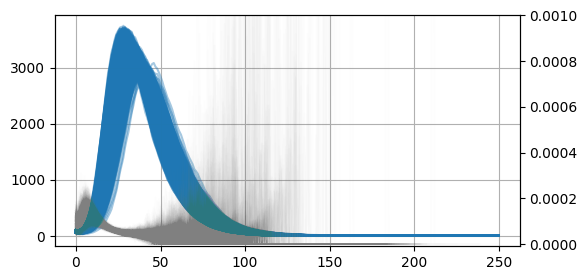

In [9]:
seed_dirs = 'initial_data/initial_data_ba_10000/'
train = df_seeds[df_seeds.set!='test']['seed_number'].values

fig, ax = plt.subplots(1,1, figsize=(6,3))
ax_b = ax.twinx()

for idx, seed_number in enumerate(train):
    seed_df = pd.read_csv(seed_dirs+f'seir_seed_{seed_number}.csv')
    ax.plot(seed_df.I, color='tab:blue', alpha=0.4)
    ax_b.plot(seed_df.Beta, color='gray', alpha=0.01)
    
ax_b.set_ylim(-1e-5, 1e-3)

ax.grid()

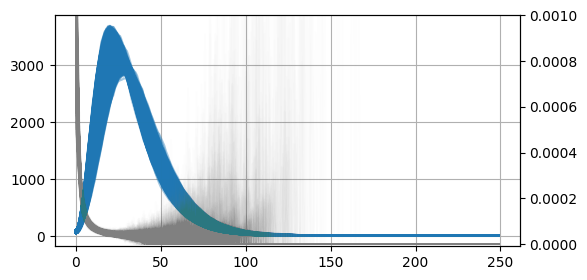

In [11]:
seed_dirs2 = 'initial_data/new_data_ba_10000/'
df_seeds2 = pd.read_csv('initial_data/new_seeds_parameters.csv')
train2 = df_seeds2[df_seeds2.set!='test']['file'].values

fig, ax = plt.subplots(1,1, figsize=(6,3))
ax_b = ax.twinx()

for idx, seed_number in enumerate(train2):
    seed_df = pd.read_csv(seed_number)
    ax.plot(seed_df.I, color='tab:blue', alpha=0.4)
    ax_b.plot(seed_df.Beta, color='gray', alpha=0.01)
    
ax_b.set_ylim(-1e-5, 1e-3)

ax.grid()

In [24]:
part_n1 = df_seeds[(df_seeds.set!='test')&(
            df_seeds.tau==0.04)&(df_seeds.rho==0.005)]
part_n2 = df_seeds2[(df_seeds2.set!='test')&(
            df_seeds2.beta==0.04)&(df_seeds2.init_inf==0.005)]

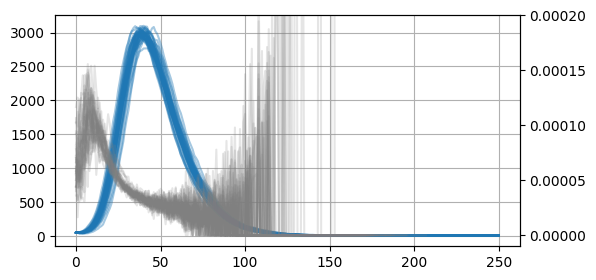

In [34]:
fig, ax = plt.subplots(1,1, figsize=(6,3))
ax_b = ax.twinx()

for idx, seed_number in enumerate(part_n1.seed_number.values):
    seed_df1 = pd.read_csv(seed_dirs+f'seir_seed_{seed_number}.csv')
    ax.plot(seed_df1.I, color='tab:blue', alpha=0.4)
    ax_b.plot(seed_df1.Beta, color='gray', alpha=0.2)
    
        
ax_b.set_ylim(-1e-5, 2e-4)
ax.grid()

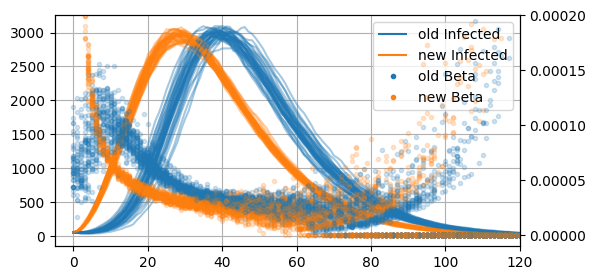

In [75]:
fig, ax = plt.subplots(1,1, figsize=(6,3))
ax_b = ax.twinx()

for seed1, seed2 in zip(part_n1.seed_number.values, part_n2.file.values):
    seed_df1 = pd.read_csv(seed_dirs+f'seir_seed_{seed1}.csv')
    l1 = ax.plot(seed_df1.I, color='tab:blue', alpha=0.4,
                label='old Infected')
    l3 = ax_b.plot(seed_df1.Beta, color='tab:blue', alpha=0.2,
                  label='old Beta', ls='', marker='.')
    
    seed_df2 = pd.read_csv(seed2)
    l2 = ax.plot(seed_df2.I, color='tab:orange', alpha=0.4,
                label='new Infected')
    l4 = ax_b.plot(seed_df2.Beta, color='tab:orange', alpha=0.2,
                  label='new Beta', ls='', marker='.')
    
    
lns = l1+l2+l3+l4
labs = [l.get_label() for l in lns]

leg = ax.legend(lns, labs)
for lh in leg.legend_handles: 
    lh.set_alpha(1)
leg.set_zorder(99)

ax_b.set_ylim(-1e-5, 2e-4)
plt.xlim(-5, 120)
ax.grid()

In [88]:
part_n2.shape

(40, 7)

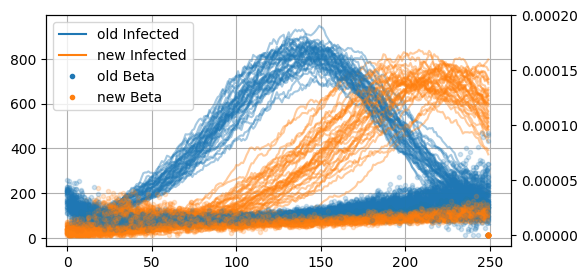

In [93]:
fig, ax = plt.subplots(1,1, figsize=(6,3))
ax_b = ax.twinx()

seed_dirs = 'initial_data/initial_data_sw_10000/'
seed_dirs2 = 'initial_data/new_sw_10000/'
files = glob.glob('initial_data/new_sw_10000/*.csv')[:40]

for seed1, seed2 in zip(part_n1.seed_number.values, files):
    seed_df1 = pd.read_csv(seed_dirs+f'seir_seed_{seed1}.csv')
    l1 = ax.plot(seed_df1.I, color='tab:blue', alpha=0.4,
                label='old Infected')
    l3 = ax_b.plot(seed_df1.Beta, color='tab:blue', alpha=0.2,
                  label='old Beta', ls='', marker='.')
    
    seed_df2 = pd.read_csv(seed2)
    l2 = ax.plot(seed_df2.I, color='tab:orange', alpha=0.4,
                label='new Infected')
    l4 = ax_b.plot(seed_df2.Beta, color='tab:orange', alpha=0.2,
                  label='new Beta', ls='', marker='.')
    
    
lns = l1+l2+l3+l4
labs = [l.get_label() for l in lns]

leg = ax.legend(lns, labs)
for lh in leg.legend_handles: 
    lh.set_alpha(1)
leg.set_zorder(99)

ax_b.set_ylim(-1e-5, 2e-4)
#plt.xlim(-5, 120)
ax.grid()

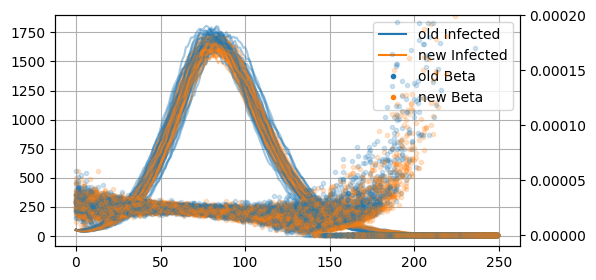

In [94]:
fig, ax = plt.subplots(1,1, figsize=(6,3))
ax_b = ax.twinx()

seed_dirs = 'initial_data/initial_data_r_10000/'
files = glob.glob('initial_data/new_r_10000/*.csv')[:40]

for seed1, seed2 in zip(part_n1.seed_number.values, files):
    seed_df1 = pd.read_csv(seed_dirs+f'seir_seed_{seed1}.csv')
    l1 = ax.plot(seed_df1.I, color='tab:blue', alpha=0.4,
                label='old Infected')
    l3 = ax_b.plot(seed_df1.Beta, color='tab:blue', alpha=0.2,
                  label='old Beta', ls='', marker='.')
    
    seed_df2 = pd.read_csv(seed2)
    l2 = ax.plot(seed_df2.I, color='tab:orange', alpha=0.4,
                label='new Infected')
    l4 = ax_b.plot(seed_df2.Beta, color='tab:orange', alpha=0.2,
                  label='new Beta', ls='', marker='.')
    
    
lns = l1+l2+l3+l4
labs = [l.get_label() for l in lns]

leg = ax.legend(lns, labs)
for lh in leg.legend_handles: 
    lh.set_alpha(1)
leg.set_zorder(99)

ax_b.set_ylim(-1e-5, 2e-4)
#plt.xlim(-5, 120)
ax.grid()

## sw

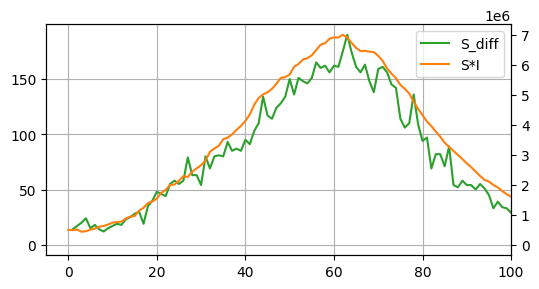

In [95]:
fig, ax = plt.subplots(1,1, figsize=(6,3))
ax_b = ax.twinx()

l1 = ax.plot(-seed_df1.S.diff(), color='tab:green', label='S_diff')
l2 = ax_b.plot(seed_df1.S * seed_df1.I, color='tab:orange', label='S*I')

plt.xlim(-5, 100)

lns = l1+l2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0)
ax.grid()

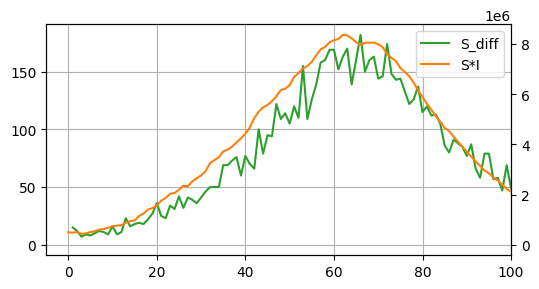

In [96]:
fig, ax = plt.subplots(1,1, figsize=(6,3))
ax_b = ax.twinx()

l1 = ax.plot(-seed_df2.S.diff(), color='tab:green', label='S_diff')
l2 = ax_b.plot(seed_df2.S * seed_df1.I, color='tab:orange', label='S*I')

plt.xlim(-5, 100)


lns = l1+l2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0)
ax.grid()

## ba

In [49]:
seed_df1.head()

,S,E,I,R,Beta
0,9950,0,50,0,0.000103
1,9899,51,45,5,0.000112
2,9849,96,48,7,0.000078
3,9812,124,52,12,0.000104
4,9759,167,60,14,0.000084


In [50]:
seed_df2.head()

,S,E,I,R,Beta
0,9950,0,50,0,0.000726
1,9589,345,65,1,0.000542
2,9251,637,106,6,0.000355
3,8903,919,161,17,0.000254
4,8539,1183,247,31,0.000173


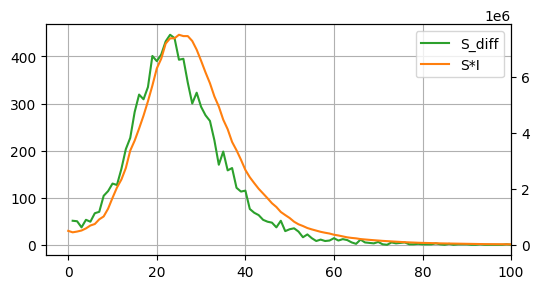

In [56]:
fig, ax = plt.subplots(1,1, figsize=(6,3))
ax_b = ax.twinx()

l1 = ax.plot(-seed_df1.S.diff(), color='tab:green', label='S_diff')
l2 = ax_b.plot(seed_df1.S * seed_df1.I, color='tab:orange', label='S*I')

plt.xlim(-5, 100)

lns = l1+l2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0)
ax.grid()

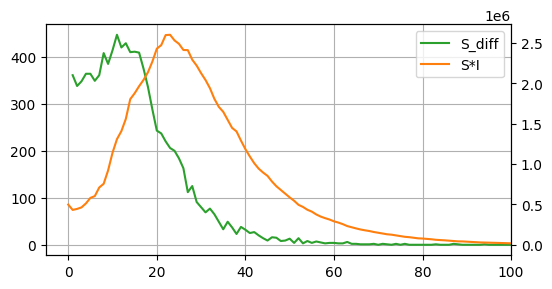

In [57]:
fig, ax = plt.subplots(1,1, figsize=(6,3))
ax_b = ax.twinx()

l1 = ax.plot(-seed_df2.S.diff(), color='tab:green', label='S_diff')
l2 = ax_b.plot(seed_df2.S * seed_df1.I, color='tab:orange', label='S*I')

plt.xlim(-5, 100)


lns = l1+l2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0)
ax.grid()